In [2]:
import pandas as pd
from pandas import read_csv
data1=pd.read_csv('used_PROJECT_DATANEW.csv')
data=data1
data1.head(5)


,Y_O_REP,AGE,SEX,OCCUP,MAR_STA,DUR_EPIS,P_PSY_HX,P_MED_HX,FAM_P_HX,P_SOC_HX,...,INT_GFK,INT_S_A_D,INT_CAL,INT_PROV,JUDGMT,INSIGHT,PSE,EEG,DIAGN,CLASS
0,2015,56,F,NURSE,WIDOW,0.5,RAPE,HYPTENSIVE,NO,YES,...,NaN,NaN,NaN,NaN,NaN,PARTIAL,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
1,2016,28,F,UNEMPLOYED,MARRIED,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POOR,POOR,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
2,2016,26,M,UNEMPLOYED,SINGLE,1.0,NO,SHORT-SIGHT,NO,NO,...,NaN,NaN,NaN,NaN,POOR,PARTIAL,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
3,2016,20,M,STUDENT,SINGLE,2.0,NaN,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
4,2016,34,F,UNEMPLOYED,SINGLE,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POOR,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ


In [3]:
print(data.dtypes)

Y_O_REP         int64
AGE             int64
SEX            object
OCCUP          object
MAR_STA        object
DUR_EPIS      float64
P_PSY_HX       object
P_MED_HX       object
FAM_P_HX       object
P_SOC_HX       object
P_SEX_HX       object
FOR_HX         object
PREMOBD_HX     object
MSE            object
SPEECH         object
MOOD           object
AFFECT         object
TH_FORM        object
TH_STRM        object
TH_CONTENT     object
TH_POSS        object
PERCEP         object
ORIENT         object
ATTEN          object
CONC           object
MEM_IR         object
MEM_ST         object
MEM_LT         object
INT_GFK        object
INT_S_A_D      object
INT_CAL        object
INT_PROV       object
JUDGMT         object
INSIGHT        object
PSE            object
EEG            object
DIAGN          object
CLASS          object
dtype: object


In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
data.drop(['Y_O_REP','AGE','SEX','DIAGN'], axis = 1, inplace = True)
#data.drop(['DIAGN'], axis = 1, inplace = True)
#data.convert_objects(convert_numeric=True)
data.fillna(0, inplace=True)
def handle_non_num_data(data):
    columns=data.columns.values
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        if data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents=data[column].values.tolist()
            unique_elements=set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            data[column]=list(map(convert_to_int, data[column]))
    return data
data= handle_non_num_data(data)
print(data.head())
#print(data.CLASS)


   OCCUP  MAR_STA  DUR_EPIS  P_PSY_HX  P_MED_HX  FAM_P_HX  P_SOC_HX  P_SEX_HX  \
0      3        4       0.5         3         9         1         2         2   
1      8        3      48.0         0         0         0         0         0   
2      8        1       1.0         4        10         1         1         2   
3      2        1       2.0         0         0         0         2         2   
4      8        1       6.0         0         0         0         0         0   

   FOR_HX  PREMOBD_HX  ...  MEM_LT  INT_GFK  INT_S_A_D  INT_CAL  INT_PROV  \
0       1           0  ...       3        0          0        0         0   
1       0           0  ...       0        0          0        0         0   
2       2           2  ...       3        0          0        0         0   
3       1           0  ...       1        0          0        0         0   
4       0           0  ...       1        0          0        0         0   

   JUDGMT  INSIGHT  PSE  EEG  CLASS  
0       0   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [5]:
class_counts = data.groupby('CLASS').size()
print(class_counts)

CLASS
0    54
1    97
dtype: int64


In [6]:
data_discr=data.describe()
print(data_discr)

            OCCUP     MAR_STA    DUR_EPIS    P_PSY_HX    P_MED_HX    FAM_P_HX  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean     6.569536    1.688742   59.253311    4.529801    8.556291    1.092715   
std      5.100993    1.033992   94.303888    1.975881    6.005149    0.603887   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    2.000000    4.000000    1.000000    1.000000   
50%      5.000000    1.000000   24.000000    6.000000   12.000000    1.000000   
75%      8.000000    3.000000   60.000000    6.000000   13.000000    1.000000   
max     20.000000    4.000000  384.000000    6.000000   18.000000    2.000000   

         P_SOC_HX    P_SEX_HX      FOR_HX  PREMOBD_HX  ...      MEM_LT  \
count  151.000000  151.000000  151.000000  151.000000  ...  151.000000   
mean     1.245033    1.629139    0.933775    1.622517  ...    2.052980   
std      0.599632    0.805116    0.442250    0.9

In [7]:
from pandas import set_option
set_option('display.width',100)
set_option('precision',2)
correlations = data.corr(method='pearson')
print(correlations)

               OCCUP   MAR_STA  DUR_EPIS  P_PSY_HX  P_MED_HX  FAM_P_HX  P_SOC_HX  P_SEX_HX  \
OCCUP       1.00e+00  5.15e-02  1.79e-01 -1.36e-02 -1.22e-01     -0.28     -0.07     -0.17   
MAR_STA     5.15e-02  1.00e+00  5.10e-02 -3.24e-04  8.82e-02      0.09     -0.05      0.09   
DUR_EPIS    1.79e-01  5.10e-02  1.00e+00  3.20e-01 -2.46e-01      0.18      0.13      0.02   
P_PSY_HX   -1.36e-02 -3.24e-04  3.20e-01  1.00e+00  3.51e-01      0.38      0.37      0.33   
P_MED_HX   -1.22e-01  8.82e-02 -2.46e-01  3.51e-01  1.00e+00      0.36      0.14      0.47   
FAM_P_HX   -2.77e-01  8.92e-02  1.78e-01  3.78e-01  3.57e-01      1.00      0.23      0.40   
P_SOC_HX   -6.99e-02 -4.82e-02  1.34e-01  3.68e-01  1.38e-01      0.23      1.00      0.53   
P_SEX_HX   -1.72e-01  9.27e-02  2.29e-02  3.34e-01  4.69e-01      0.40      0.53      1.00   
FOR_HX     -2.85e-01  5.67e-02  1.46e-01  4.60e-01  3.33e-01      0.42      0.51      0.68   
PREMOBD_HX -1.58e-01  2.19e-02  2.83e-01  5.43e-01  4.00e-01

In [8]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data.values
# separate array into input and output components
X = array[:,0:32]
Y = array[:,32]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
#print(rescaledX[0:5,:]
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
SrescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(SrescaledX[0:5,:])

[[-0.702  2.243 -0.625 -0.777  0.074 -0.154  1.263  0.462  0.15  -1.7
  -0.057 -0.526 -0.007  1.651 -1.385 -1.131  1.21  -1.137  0.13   0.451
   0.115  0.519  0.65   0.768  0.816 -1.102 -1.054 -0.992 -1.008 -1.571
   0.068 -1.096]
 [ 0.281  1.272 -0.12  -2.3   -1.43  -1.815 -2.083 -2.03  -2.118 -1.7
  -0.057 -0.526 -0.375 -0.65  -1.385 -1.131  1.21  -1.137 -1.339 -1.896
   0.115  0.519 -2.515 -2.284 -1.768 -1.102 -1.054 -0.992 -1.008 -0.215
   1.005 -1.096]
 [ 0.281 -0.668 -0.62  -0.269  0.241 -0.154 -0.41   0.462  2.419  0.396
  -0.057 -1.494 -0.742  1.268 -1.385  1.937 -0.749 -1.137 -1.339 -1.896
   0.115  0.519  0.65   0.768  0.816 -1.102 -1.054 -0.992 -1.008 -0.215
   0.068 -1.096]
 [-0.899 -0.668 -0.609 -2.3   -1.43  -1.815  1.263  0.462  0.15  -1.7
  -1.781 -1.01   1.829 -0.65  -1.385 -1.131  0.72  -1.137 -1.045  0.451
   0.115  0.519 -1.46  -1.266 -0.907 -1.102 -1.054 -0.992 -1.008 -1.571
  -1.805 -1.096]
 [ 0.281 -0.668 -0.567 -2.3   -1.43  -1.815 -2.083 -2.03  -2.118 -1.7
  -1

In [12]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=2)
print(normalizedX[0:5,:])

[[0.15 0.2  0.03 0.15 0.46 0.05 0.1  0.1  0.05 0.   0.05 0.1  0.2  0.46
  0.   0.   0.51 0.   0.25 0.05 0.05 0.1  0.15 0.15 0.15 0.   0.   0.
  0.   0.   0.1  0.05]
 [0.16 0.06 0.96 0.   0.   0.   0.   0.   0.   0.   0.02 0.04 0.06 0.06
  0.   0.   0.2  0.   0.   0.   0.02 0.04 0.   0.   0.   0.   0.   0.
  0.   0.02 0.06 0.02]
 [0.45 0.06 0.06 0.23 0.56 0.06 0.06 0.11 0.11 0.11 0.06 0.   0.11 0.45
  0.   0.17 0.11 0.   0.   0.   0.06 0.11 0.17 0.17 0.17 0.   0.   0.
  0.   0.06 0.11 0.06]
 [0.15 0.07 0.15 0.   0.   0.   0.15 0.15 0.07 0.   0.   0.07 0.66 0.22
  0.   0.   0.59 0.   0.07 0.07 0.07 0.15 0.07 0.07 0.07 0.   0.   0.
  0.   0.   0.   0.07]
 [0.45 0.06 0.34 0.   0.   0.   0.   0.   0.   0.   0.   0.11 0.51 0.45
  0.   0.   0.28 0.   0.28 0.06 0.   0.   0.06 0.06 0.06 0.   0.   0.
  0.   0.   0.17 0.06]]


In [13]:
normalizedX.shape

(151, 32)

In [14]:
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
array = data.values
X = array[:,0:32]
Y = array[:,32]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
kfold = KFold(n_splits=10, random_state=7)
model =Ridge()
results = cross_val_score(model, X, Y, cv=kfold)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.23989168930495297
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
import pandas as pd
#d={'trueval':Y, 'Predictedval': results}
#pd_=pd.DataFrame(data=d)
print(results.mean())
#pd_


1.0


In [21]:
#from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(Y,results)

In [22]:
# Compare Algorithms
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#filename = ' pima-indians-diabetes. data. csv'
#names = [' preg' , ' plas ' , ' pres ' , ' skin' , ' test ' , ' mass ' , ' pedi ' , ' age ' , ' class ' ]
#dataframe = read_csv(filename, names=names)
array = data.values
X = array[:,0:32]
Y = array[:,32]
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


 LR: 1.000000 (0.000000) 
 LDA: 1.000000 (0.000000) 
 KNN: 0.920000 (0.049889) 
 CART: 1.000000 (0.000000) 
 NB: 0.801250 (0.084411) 
 SVM: 1.000000 (0.000000) 


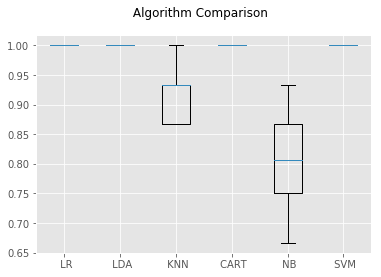

In [49]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
# separate class column
array = data.values
X = array[:,0:32]
Y = array[:,32]
# prepare models
models = []
models.append(( ' LR' , LogisticRegression()))
models.append(( ' LDA' , LinearDiscriminantAnalysis()))
models.append(( ' KNN' , KNeighborsClassifier()))
models.append(( ' CART' , DecisionTreeClassifier()))
models.append(( ' NB' , BernoulliNB()))
models.append(( ' SVM' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7)
 cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
#13.2. Compare Machine Learning Algorithms Consistently 85
 names.append(name)
 msg = "%s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

END OF ANALYSIS

In [26]:
# MSc PROJECT RESULT PLOTS

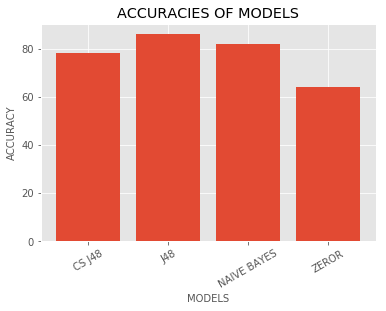

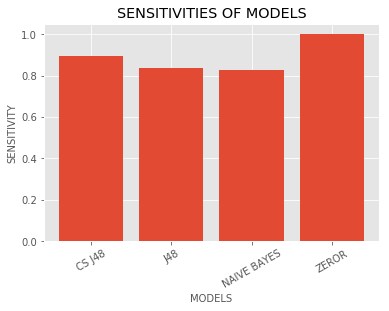

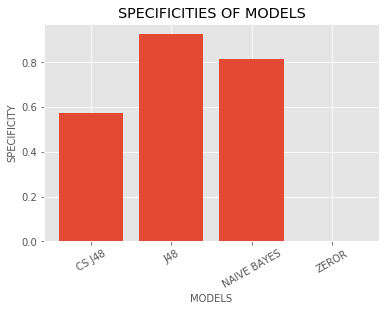

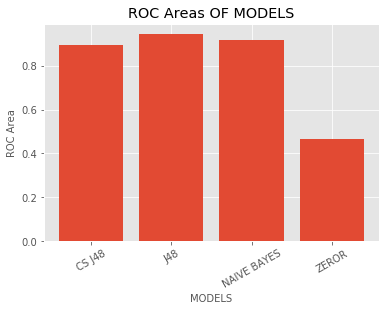

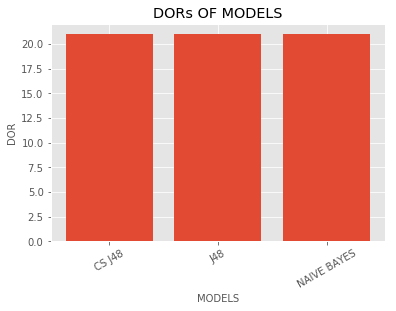

In [25]:
LABEL= ['CS J48','J48', 'NAIVE BAYES','ZEROR']
ACCURACY=[78,86,82,64]
sens=[0.897,0.835,0.825,1.000]
spec=[0.574,0.926,0.814,0]
DOR=[21,21,21]
a_roc=[0.895,0.943,0.917,0.467]
index=np.arange(len(LABEL))
plt.bar(index,ACCURACY)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('ACCURACY', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('ACCURACIES OF MODELS')
plt.show()


index=np.arange(len(LABEL))
plt.bar(index,sens)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('SENSITIVITY', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('SENSITIVITIES OF MODELS')
plt.show()

index=np.arange(len(LABEL))
plt.bar(index,spec)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('SPECIFICITY', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('SPECIFICITIES OF MODELS')
plt.show()

index=np.arange(len(LABEL))
plt.bar(index,a_roc)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('ROC Area', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('ROC Areas OF MODELS')
plt.show()

LABEL= ['CS J48','J48', 'NAIVE BAYES']
index=np.arange(len(LABEL))
plt.bar(index,DOR)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('DOR', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('DORs OF MODELS')
plt.show()


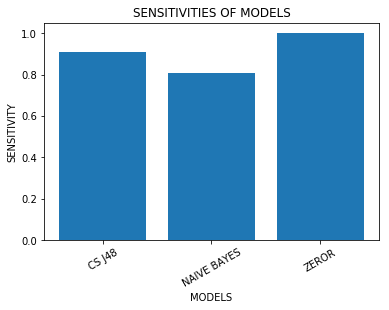

In [6]:
LABEL= ['CS J48', 'NAIVE BAYES','ZEROR']
#ACCURACY=[89,82,64]
sens=[0.91,0.81,1]
#spec=[0.87,0.83,0]
index=np.arange(len(LABEL))
plt.bar(index,sens)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('SENSITIVITY', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('SENSITIVITIES OF MODELS')
plt.show()

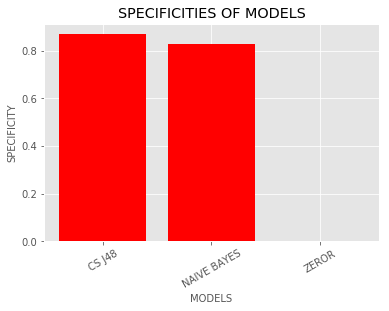

In [24]:
LABEL= ['CS J48', 'NAIVE BAYES','ZEROR']
#ACCURACY=[89,82,64]
#sens=[0.91,0.81,1]
spec=[0.87,0.83,0]
index=np.arange(len(LABEL))
plt.bar(index,spec, color='red')
#plt.grid()
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('SPECIFICITY', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('SPECIFICITIES OF MODELS')
plt.show()

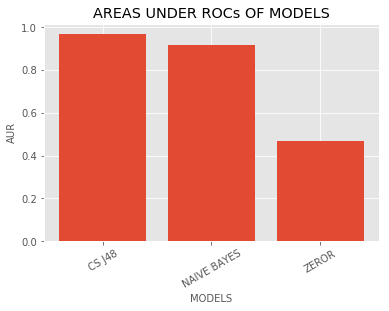

In [57]:
LABEL= ['CS J48', 'NAIVE BAYES','ZEROR']
#ACCURACY=[89,82,64]
#sens=[0.91,0.81,1]
#spec=[0.87,0.83,0]
a_roc=[0.968,0.919,0.467]
index=np.arange(len(LABEL))
plt.bar(index,a_roc)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('AUR', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('AREAS UNDER ROCs OF MODELS')
plt.show()

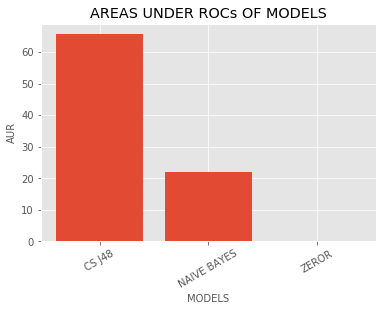

[65.65, 21.94, 0]

In [58]:
LABEL= ['CS J48', 'NAIVE BAYES','ZEROR']
#ACCURACY=[89,82,64]
#sens=[0.91,0.81,1]
#spec=[0.87,0.83,0]
a_roc=[0.968,0.919,0.467]
DOR=[]
index=np.arange(len(LABEL))
plt.bar(index,dor)
plt.xlabel('MODELS', fontsize=10)
plt.ylabel('DOR', fontsize=10)
plt.xticks(index, LABEL, fontsize=10, rotation=30)
plt.title('DORs OF MODELS')
plt.show()